# How to make a powerspectrum from Vela X-1's daily fits light curve

### 1. Download VELAX-1_daily_lc.fits, VELAX-1_steps_lc.fits, and OccView.py files from GBM Earth Occultation website http://heastro.phys.lsu.edu/gbm/.

# 2. Load numpy and matplotlib into the interactive name space so they can be easily used

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 3. Examine Daily Fits file headers

In [2]:
import astropy.io.fits as fits
hdulist = fits.open("VELAX-1_daily_lc.fits")
hdulist.info()
print '*******Primary Header********'
print repr(hdulist[0].header)
print '*******FlUX_HIST Header*******'
print repr(hdulist[1].header)
print '*******ECHAN Header**********'
print repr(hdulist[2].header)

Filename: VELAX-1_daily_lc.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1  RATE        BinTableHDU     96   1601R x 7C   [D, 6D, 6D, D, D, I, I]   
  2  ENEBAND     BinTableHDU     27   6R x 2C   [D, D]   
*******Primary Header********
SIMPLE  =                    T /Dummy Created by MWRFITS v1.8                   
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               
*******FlUX_HIST Header*******
XTENSION= 'BINTABLE'           /Written by IDL:  Thu May 18 12:25:40 2017       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                  124 /Number of bytes per row                         
NAXIS2  =         

### 4.Examine energy channels edges

In [3]:
echan = hdulist[2].data
print echan

[(  11.6729002 ,   26.77063179) (  26.77063179,   50.30397415)
 (  50.30397415,  101.91491699) ( 101.91491699,  294.7149353 )
 ( 294.7149353 ,  539.11651611) ( 539.11651611,  985.02740479)]


### 5. Load python modules

In [4]:
from OccView import OccView
import scipy.signal
import numpy
import matplotlib.pyplot as plt

### 6. Read daily FITS file

In [5]:
ov = OccView("VELAX-1_daily_lc.fits")

### 8. Get times (MJD), fluxes and errors (photons/cm^2/s)  for channel 0 (12-25 keV)

In [6]:
h=ov.GetFluxes(56000,57890,0)
t = h["time"]
flux = h["flux"]
err = h["error"]
flx=flux.byteswap().newbyteorder()

### 9. Plot light curve

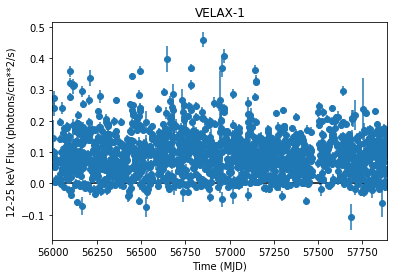

In [7]:
plt.errorbar(t,flx,yerr=err,fmt='o')
plt.axhline(y=0, xmin=0, xmax=1,color='k')
plt.xlim(56000,57890)
plt.xlabel("Time (MJD)")
plt.ylabel("12-25 keV Flux (photons/cm**2/s)")
plt.title('VELAX-1')

### 10. Set up angular frequencies for Lomb Scargle, using periods between 2 days and 200 days.

In [8]:
nout=4500
om=numpy.linspace(0.005*2*numpy.pi,0.5*2*numpy.pi,nout)

### 11. Make power spectrum using scipy.lombscargle

In [9]:
pgram=scipy.signal.lombscargle(t-min(t),flx,om)

### 12. Plot power spectrum

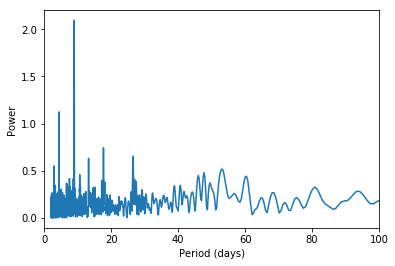

In [10]:
plt.plot(2*numpy.pi/om,numpy.sqrt(4*pgram))
plt.xlim(0,100)
plt.xlabel("Period (days)")
plt.ylabel("Power")

### 13. Find period for peak power.

In [11]:
print "Peak power : "+str(max(pgram))
print "at period : "+str(2*numpy.pi/om[numpy.argmax(pgram)])+" days"

Peak power : 1.09821521194
at period : 8.96831487775 days


### Orbital period for Vela X-1 is 8.96 days